# Claculate and plot the monthly climatology for NOAA OLR

In [1]:
import xarray as xr
import numpy as np 
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt

from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

## Open data file and read in data

In [2]:
path='/shared/ccsm4/khuang/obs/NOAA-OLR/'
file = 'NOAA.OLR.daily.mean.1979-2019.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

## Calculate the monthly climatology

In [4]:
ds_climo=ds.groupby('time.month').mean()
ds_climo

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    olr      (month, lat, lon) float32 159.38976 159.38976 ... 165.07404

## Pannel plot of the monthly climatology

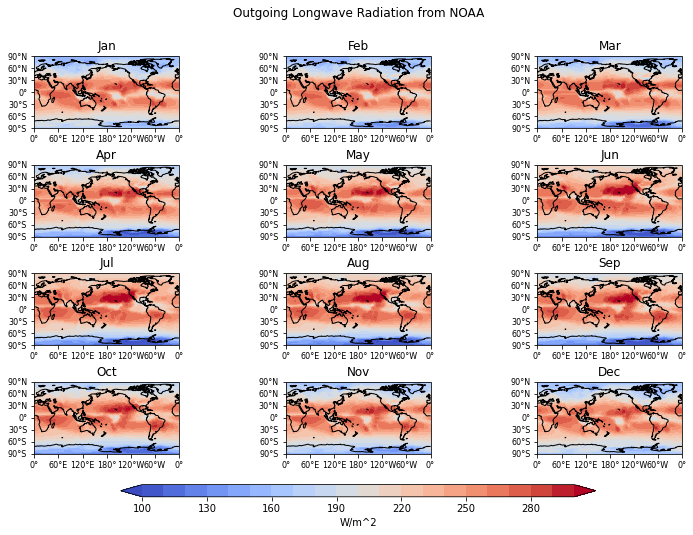

In [6]:
# Define the figure and each axis for the 4 rows and 3 column
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

# Define the contour levels
clevs=np.arange(100,310,10)

# Set the scalar for the subtitles
subtitle=["","Jan","Feb","Mar",
             "Apr","May","Jun",
             "Jul","Aug","Sep",
             "Oct","Nov","Dec"]

#Loop over all of the seasons and plot
for i,mons in enumerate(ds_climo['month']):

        # Select the season
        data=ds_climo['olr'].sel(month=mons)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['lat'],data,clevs,
                          transform = ccrs.PlateCarree(central_longitude=180),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree(central_longitude=180))
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree(central_longitude=180))
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        # set label size
        axs[i].tick_params(axis='x', labelsize=8)
        axs[i].tick_params(axis='y', labelsize=8)

        
        # Title each subplot with the name of the season
        axs[i].set_title(subtitle[mons.values])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.18, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

# Add a big title at the top
plt.suptitle('Outgoing Longwave Radiation from NOAA')
plt.savefig('./Figs/OLR_monthly_climatology.png')